# Analysis

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
%pylab inline

# seaborn.set()

Populating the interactive namespace from numpy and matplotlib


Реперные точки:

In [2]:
NOISE_LEVELS = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

# FastText RNN

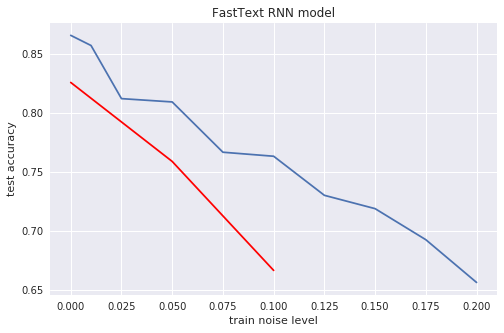

In [27]:
gru_noise_lvl = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
gru_acc = [0.8658, 0.8572, 0.8122, 0.8094, 0.7668, 0.7634, 0.7303, 0.719, 0.6927, 0.6565]

lstm_noise = [0, 0.05, 0.1]
lstm_acc = [0.8259, 0.7590, 0.6667]

plt.figure(figsize=(8,5))
plt.title('FastText RNN model')
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(gru_noise_lvl, gru_acc)
plt.plot(lstm_noise, lstm_acc, 'r')

# CharCNN without embedding

In [24]:
results = pd.read_csv('results/CharCNN.csv', index_col=0)

In [21]:
results.sample(2)

,acc_test,acc_train,data_desc,dropout,epochs,f1_test,f1_train,init_function,lr,model_desc,model_type,noise_level_test,noise_level_train,task,trainable_params
50,0.76456,0.762000,Maxlen 512,0.5,30,0.758929,0.744404,<function xavier_normal at 0x7f843d1b9048>,0.0001,CharCNN(\n (conv): Sequential(\n (0): Conv...,charCNN,0.00,0.100,IMDB binary classification,287490
63,0.74208,0.746267,Maxlen 512,0.5,30,0.741811,0.743150,<function xavier_normal at 0x7f843d1b9048>,0.0001,CharCNN(\n (conv): Sequential(\n (0): Conv...,charCNN,0.05,0.125,IMDB binary classification,287490


In [25]:
results = results[['acc_train', 'acc_test', 'f1_train', 'f1_test', 'noise_level_train', 'noise_level_test']]

### Test accuracy on test noise level for different train noise levels

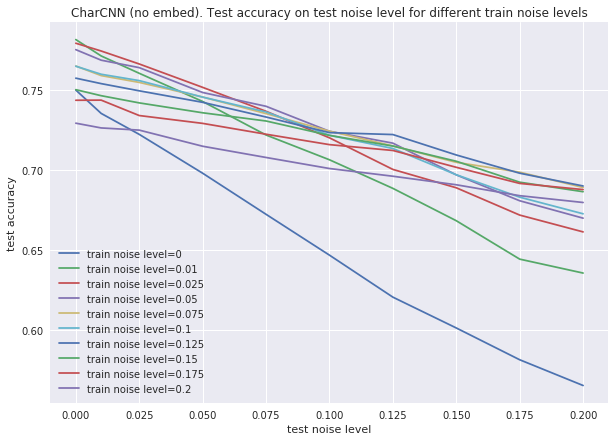

In [47]:
plt.figure(figsize=(10,7))
plt.title('CharCNN (no embed). Test accuracy on test noise level for different train noise levels')
plt.xlabel('test noise level')
plt.ylabel('test accuracy')
for noise_level_train in NOISE_LEVELS:
    plot_data = results[results.noise_level_train == noise_level_train]
    plt.plot(plot_data['noise_level_test'], plot_data['acc_test'], label='train noise level=%s' % noise_level_train)
plt.legend()

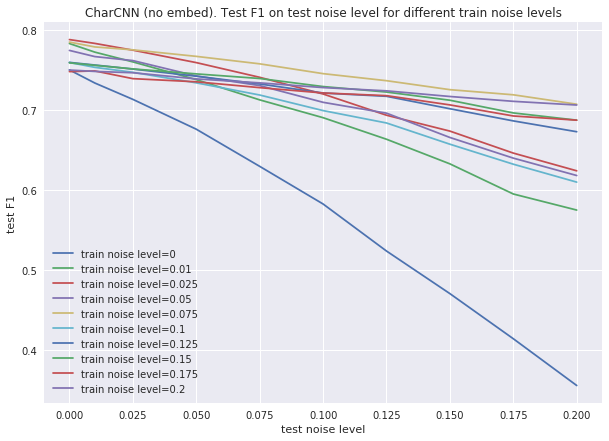

In [48]:
plt.figure(figsize=(10,7))
plt.title('CharCNN (no embed). Test F1 on test noise level for different train noise levels')
plt.xlabel('test noise level')
plt.ylabel('test F1')
for noise_level_train in NOISE_LEVELS:
    plot_data = results[results.noise_level_train == noise_level_train]
    plt.plot(plot_data['noise_level_test'], plot_data['f1_test'], label='train noise level=%s' % noise_level_train)
plt.legend()

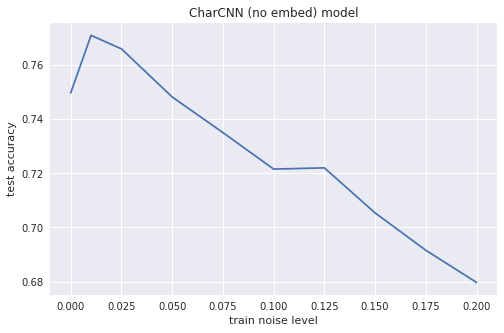

In [49]:
plot_x = NOISE_LEVELS
plot_y = []

for noise_level in NOISE_LEVELS:
    plot_data = results[(results.noise_level_train == noise_level) & (results.noise_level_test == noise_level)]
    assert len(plot_data) == 1
    plot_y.append(plot_data['acc_test'].iloc[0])

plt.figure(figsize=(8,5))
plt.title('CharCNN (no embed) model')
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(plot_x, plot_y)

In [52]:
print([round(x, 4) for x in plot_y])

[0.7497, 0.771, 0.766, 0.7482, 0.735, 0.7216, 0.722, 0.7054, 0.6916, 0.6797]


# CharCNN with embedding

In [70]:
results = pd.read_csv('results/CharCNN_embed.csv', index_col=0)
results = results[['acc_train', 'acc_test', 'f1_train', 'f1_test', 'noise_level_train', 'noise_level_test']]

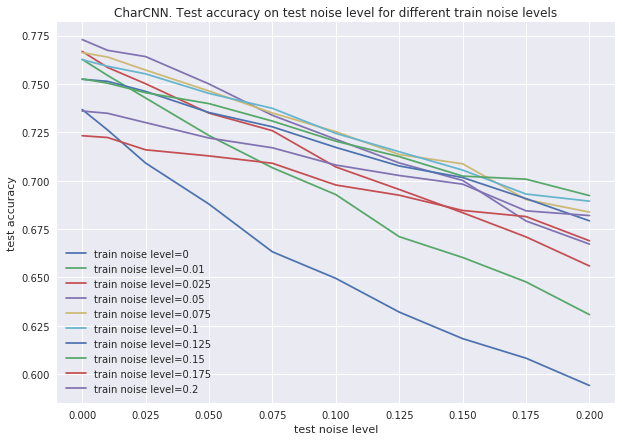

In [71]:
plt.figure(figsize=(10,7))
plt.title('CharCNN. Test accuracy on test noise level for different train noise levels')
plt.xlabel('test noise level')
plt.ylabel('test accuracy')
for noise_level_train in NOISE_LEVELS:
    plot_data = results[results.noise_level_train == noise_level_train]
    plt.plot(plot_data['noise_level_test'], plot_data['acc_test'], label='train noise level=%s' % noise_level_train)
plt.legend()

In [4]:
results = pd.read_csv('results/CharCNN_embed2.csv', index_col=0)
results = results[['acc_train', 'acc_test', 'f1_train', 'f1_test', 'noise_level_train', 'noise_level_test']]

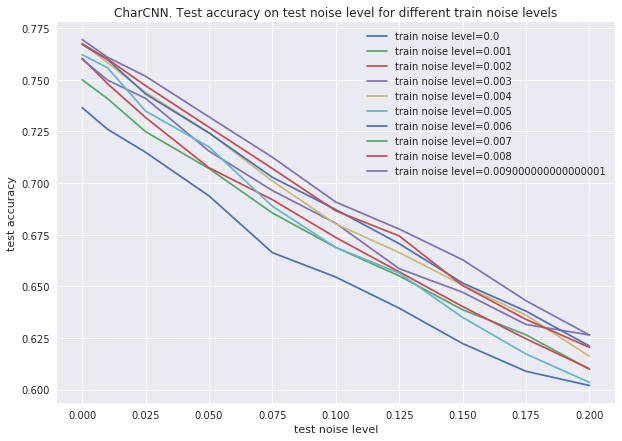

In [6]:
plt.figure(figsize=(10,7))
plt.title('CharCNN. Test accuracy on test noise level for different train noise levels')
plt.xlabel('test noise level')
plt.ylabel('test accuracy')
for noise_level_train in np.arange(0, .01, 0.001):
    plot_data = results[results.noise_level_train == noise_level_train]
    plt.plot(plot_data['noise_level_test'], plot_data['acc_test'], label='train noise level=%s' % noise_level_train)
plt.legend()

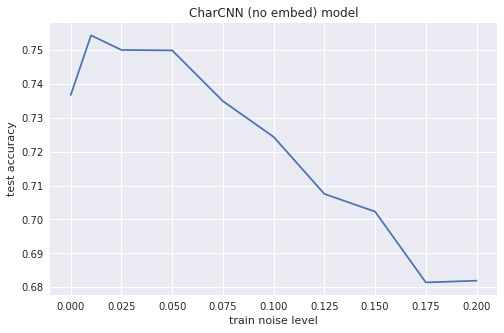

In [57]:
plot_x = NOISE_LEVELS
plot_y = []

for noise_level in NOISE_LEVELS:
    plot_data = results[(results.noise_level_train == noise_level) & (results.noise_level_test == noise_level)]
    assert len(plot_data) == 1
    plot_y.append(plot_data['acc_test'].iloc[0])

plt.figure(figsize=(8,5))
plt.title('CharCNN model')
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(plot_x, plot_y)

In [58]:
print([round(x, 4) for x in plot_y])

[0.7368, 0.7544, 0.7501, 0.75, 0.735, 0.7244, 0.7076, 0.7023, 0.6814, 0.6819]


# CharRNN with embedding

In [72]:
results = pd.read_csv('results/CharRNN_embed.csv', index_col=0)
results = results[['acc_train', 'acc_test', 'f1_train', 'f1_test', 'noise_level_train', 'noise_level_test']]

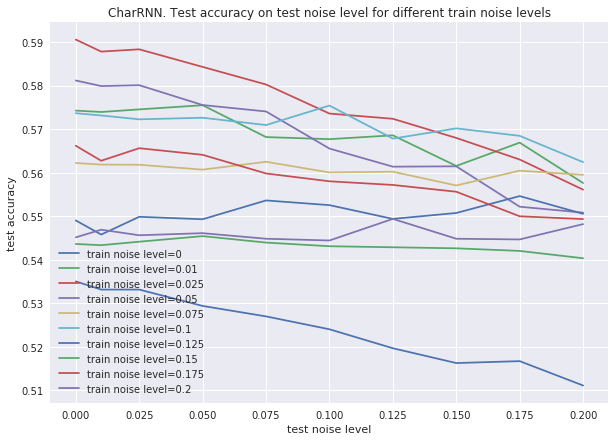

In [73]:
plt.figure(figsize=(10,7))
plt.title('CharRNN. Test accuracy on test noise level for different train noise levels')
plt.xlabel('test noise level')
plt.ylabel('test accuracy')
for noise_level_train in NOISE_LEVELS:
    plot_data = results[results.noise_level_train == noise_level_train]
    plt.plot(plot_data['noise_level_test'], plot_data['acc_test'], label='train noise level=%s' % noise_level_train)
plt.legend()

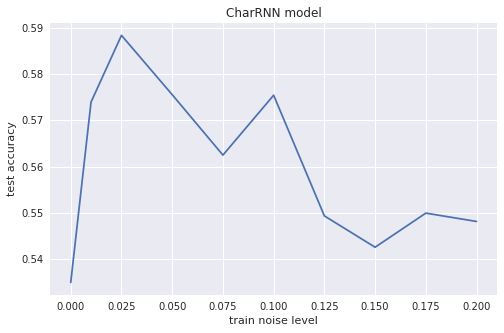

In [74]:
plot_x = NOISE_LEVELS
plot_y = []

for noise_level in NOISE_LEVELS:
    plot_data = results[(results.noise_level_train == noise_level) & (results.noise_level_test == noise_level)]
    assert len(plot_data) == 1
    plot_y.append(plot_data['acc_test'].iloc[0])

plt.figure(figsize=(8,5))
plt.title('CharRNN model')
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(plot_x, plot_y)

Результаты по CharRNN предлагаю считать невалидными. Скорее всего у них так и не наступила сходимость, графики функции потерь вообще выглядят безумно.

# Yoon Kim
train_nl == noise_nl

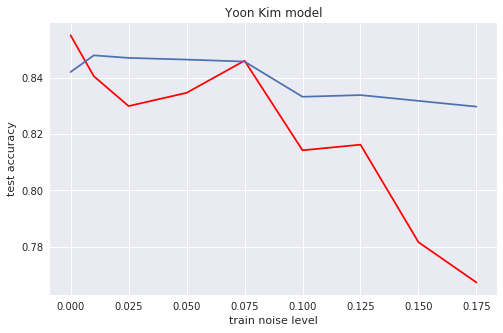

In [12]:
noise_lvl = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
noise_lvl16 = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175]  # not enough epochs

acc16 = [0.8550, 0.8405, 0.8299, 0.8346, 0.8460, 0.8142, 0.8162, 0.7816, 0.7673]
# acc = [0.8420, 0.8479, 0.8470, 0.8464, 0.8457, (0.8374 + 0.8290)/2., 0.8338, None, 0.8297, None]

noise_lvl8 = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.175]
acc8 = [0.8420, 0.8479, 0.8470, 0.8464, 0.8457, (0.8374 + 0.8290)/2., 0.8338, 0.8297]

plt.figure(figsize=(8,5))
plt.title('Yoon Kim model')
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(noise_lvl16, acc16, 'r')
plt.plot(noise_lvl8, acc8)

# Attentioned Yoon Kim

## Attention heads: 1

In [15]:
results = pd.read_csv('results/Attentioned1HYoonKim.csv', index_col=0)
results = results[['acc_train', 'acc_test', 'f1_train', 'f1_test', 'noise_level_train', 'noise_level_test']]

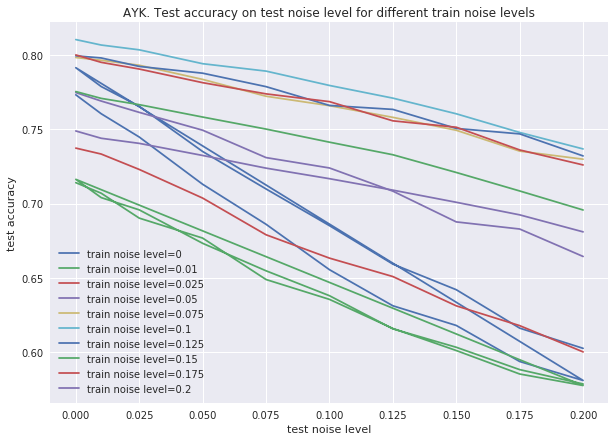

In [17]:
plt.figure(figsize=(10,7))
plt.title('AYK. Test accuracy on test noise level for different train noise levels')
plt.xlabel('test noise level')
plt.ylabel('test accuracy')
for noise_level_train in NOISE_LEVELS:
    plot_data = results[results.noise_level_train == noise_level_train]
    plt.plot(plot_data['noise_level_test'], plot_data['acc_test'], label='train noise level=%s' % noise_level_train)
plt.legend()

Duplicate results on noise 0
Duplicate results on noise 0.01


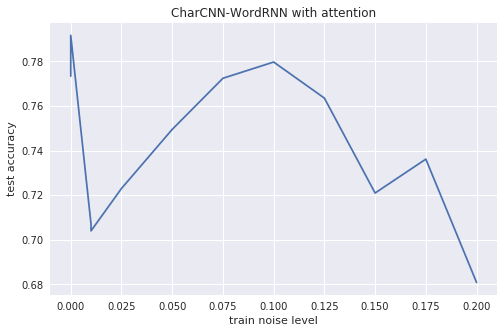

In [24]:
plot_x = []
plot_y = []

for noise_level in NOISE_LEVELS:
    plot_data = results[(results.noise_level_train == noise_level) & (results.noise_level_test == noise_level)]
    duplicate = False
    for _, res in plot_data.iterrows():
        plot_x.append(noise_level)
        plot_y.append(res['acc_test'])
        if duplicate:
            print('Duplicate results on noise %s' % noise_level)
        duplicate=True

plt.figure(figsize=(8,5))
plt.title('CharCNN-WordRNN with attention, H=1')
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(plot_x, plot_y)

## Attention heads: 4

In [27]:
results = pd.read_csv('results/Attentioned4HYoonKim.csv', index_col=0)
results = results[['acc_train', 'acc_test', 'f1_train', 'f1_test', 'noise_level_train', 'noise_level_test']]

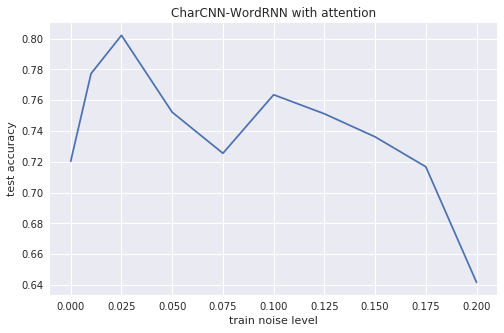

In [28]:
plot_x = NOISE_LEVELS
plot_y = []

for noise_level in NOISE_LEVELS:
    plot_data = results[(results.noise_level_train == noise_level) & (results.noise_level_test == noise_level)]
    assert len(plot_data) == 1
    plot_y.append(plot_data['acc_test'].iloc[0])

plt.figure(figsize=(8,5))
plt.title('CharCNN-WordRNN with attention, H=4')
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(plot_x, plot_y)

# Compare heads

In [33]:
noise_levels_h1 = [0, 0, 0.01, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
accuracy_h1 = [0.77336, 0.79164, 0.70696, 0.7040000000000001, 0.723, 0.74948, 0.7724, 0.77968, 0.76352, 0.72096, 0.73616, 0.68088]

noise_levels_h4 = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
accuracy_h4 = [0.72036, 0.7772399999999999, 0.80208, 0.7522, 0.7255199999999999, 0.76352, 0.75116, 0.7362, 0.7167600000000001, 0.64168]

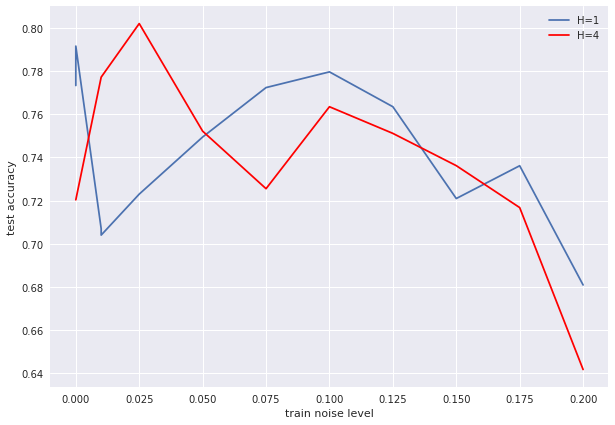

In [34]:
plt.figure(figsize=(10,7))
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(noise_levels_h1, accuracy_h1, label='H=1')
plt.plot(noise_levels_h4, accuracy_h4, color='r', label='H=4')
plt.legend()

# All

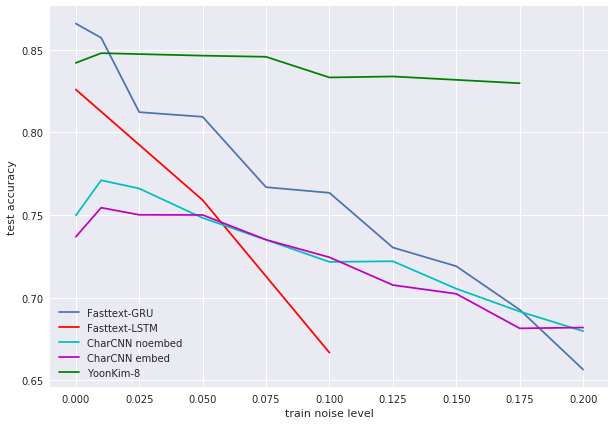

In [36]:
gru_noise_lvl = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
gru_acc = [0.8658, 0.8572, 0.8122, 0.8094, 0.7668, 0.7634, 0.7303, 0.719, 0.6927, 0.6565]

lstm_noise = [0, 0.05, 0.1]
lstm_acc = [0.8259, 0.7590, 0.6667]

charCNN_noise = NOISE_LEVELS
charCNN_acc = [0.7497, 0.771, 0.766, 0.7482, 0.735, 0.7216, 0.722, 0.7054, 0.6916, 0.6797]

charCNN_embed_noise = NOISE_LEVELS
charCNN_embed_acc = [0.7368, 0.7544, 0.7501, 0.75, 0.735, 0.7244, 0.7076, 0.7023, 0.6814, 0.6819]

yoon_kim_noise_lvl = [0, 0.01, 0.05, 0.075, 0.1, 0.125, 0.175]
yoon_kim_acc = [0.8420, 0.8479, 0.8464, 0.8457, (0.8374 + 0.8290)/2., 0.8338, 0.8297]

att_yoon_kim_h1_noise_lvl = [0, 0, 0.01, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
att_yoon_kim_h1_acc = [0.77336, 0.79164, 0.70696, 0.7040000000000001, 0.723, 0.74948, 0.7724, 0.77968, 0.76352, 0.72096, 0.73616, 0.68088]

att_yoon_kim_h4_noise_lvl = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
att_yoon_kim_h4_acc = [0.72036, 0.7772399999999999, 0.80208, 0.7522, 0.7255199999999999, 0.76352, 0.75116, 0.7362, 0.7167600000000001, 0.64168]

plt.figure(figsize=(10,7))
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(gru_noise_lvl, gru_acc, label='Fasttext-GRU')
plt.plot(lstm_noise, lstm_acc, color='r', label='Fasttext-LSTM')
plt.plot(charCNN_noise, charCNN_acc, color='c', label='CharCNN noembed')
plt.plot(charCNN_embed_noise, charCNN_embed_acc, color='m', label='CharCNN embed')
plt.plot(yoon_kim_noise_lvl, yoon_kim_acc, color='g', label='YoonKim-8')
# plt.plot(att_yoon_kim_h1_noise_lvl, att_yoon_kim_h1_acc, color='y', label='AYK-1')
# plt.plot(att_yoon_kim_h4_noise_lvl, att_yoon_kim_h4_acc, color='k', label='AYK-4')

plt.legend()

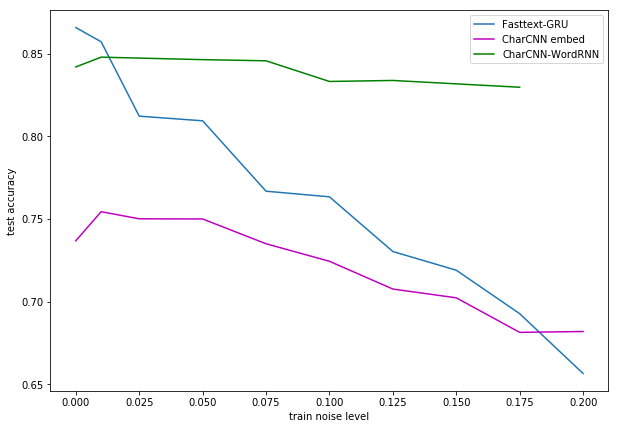

In [5]:
gru_noise_lvl = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
gru_acc = [0.8658, 0.8572, 0.8122, 0.8094, 0.7668, 0.7634, 0.7303, 0.719, 0.6927, 0.6565]

lstm_noise = [0, 0.05, 0.1]
lstm_acc = [0.8259, 0.7590, 0.6667]

charCNN_noise = NOISE_LEVELS
charCNN_acc = [0.7497, 0.771, 0.766, 0.7482, 0.735, 0.7216, 0.722, 0.7054, 0.6916, 0.6797]

charCNN_embed_noise = NOISE_LEVELS
charCNN_embed_acc = [0.7368, 0.7544, 0.7501, 0.75, 0.735, 0.7244, 0.7076, 0.7023, 0.6814, 0.6819]

yoon_kim_noise_lvl = [0, 0.01, 0.05, 0.075, 0.1, 0.125, 0.175]
yoon_kim_acc = [0.8420, 0.8479, 0.8464, 0.8457, (0.8374 + 0.8290)/2., 0.8338, 0.8297]

att_yoon_kim_h1_noise_lvl = [0, 0, 0.01, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
att_yoon_kim_h1_acc = [0.77336, 0.79164, 0.70696, 0.7040000000000001, 0.723, 0.74948, 0.7724, 0.77968, 0.76352, 0.72096, 0.73616, 0.68088]

att_yoon_kim_h4_noise_lvl = [0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
att_yoon_kim_h4_acc = [0.72036, 0.7772399999999999, 0.80208, 0.7522, 0.7255199999999999, 0.76352, 0.75116, 0.7362, 0.7167600000000001, 0.64168]

plt.figure(figsize=(10,7))
plt.xlabel('train noise level')
plt.ylabel('test accuracy')
plt.plot(gru_noise_lvl, gru_acc, label='Fasttext-GRU')
# plt.plot(lstm_noise, lstm_acc, color='r', label='Fasttext-LSTM')
# plt.plot(charCNN_noise, charCNN_acc, color='c', label='CharCNN noembed')
plt.plot(charCNN_embed_noise, charCNN_embed_acc, color='m', label='CharCNN embed')
plt.plot(yoon_kim_noise_lvl, yoon_kim_acc, color='g', label='CharCNN-WordRNN')
# plt.plot(att_yoon_kim_h1_noise_lvl, att_yoon_kim_h1_acc, color='y', label='Attention')
# plt.plot(att_yoon_kim_h4_noise_lvl, att_yoon_kim_h4_acc, color='k', label='AYK-4')

plt.legend()

  * добавить f-1 в YK
  * сохранять модели в /media/data
  * многоклассовая классификация nltk.20newsgroups
  * поэкспериментировать с русскими корпусами